In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Census_Income.csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [42]:
df.shape

(32560, 15)

In [9]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [10]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<AxesSubplot:>

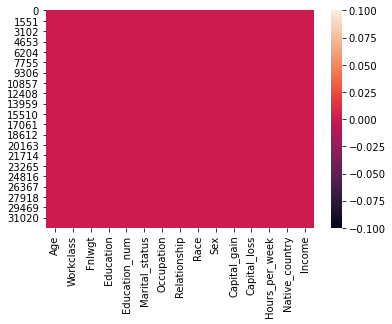

In [11]:
sn.heatmap(df.isnull())

# Visualization of Data

 Male      21789
 Female    10771
Name: Sex, dtype: int64


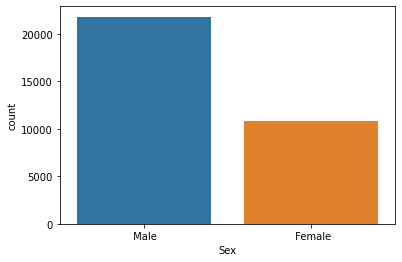

In [12]:
ax = sn.countplot(x="Sex", data=df)
print(df["Sex"].value_counts())

There are 21789 male and 10771 female

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64


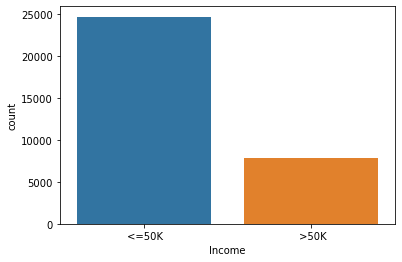

In [13]:
ax = sn.countplot(x="Income", data=df)
print(df["Income"].value_counts())

<=50K income group is more

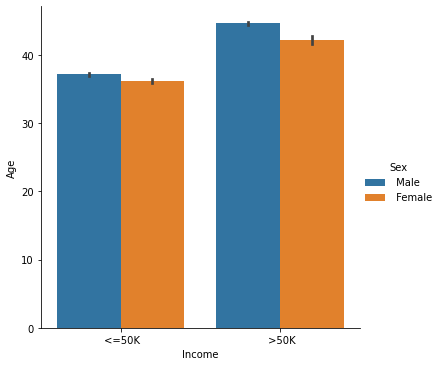

In [22]:
g=sn.catplot(x="Income",y="Age",hue="Sex",data=df,kind="bar")
plt.show()

Income is increased by age and Male's income is more than female

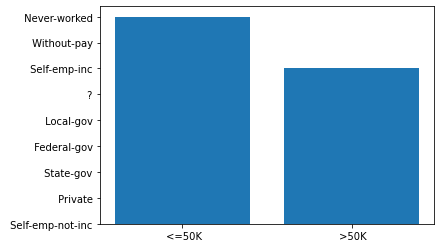

In [27]:
plt.bar(df['Income'],df['Workclass'])
plt.show()

Self employed and wages worker income is less 50K comapre to Gov employee and private company employee

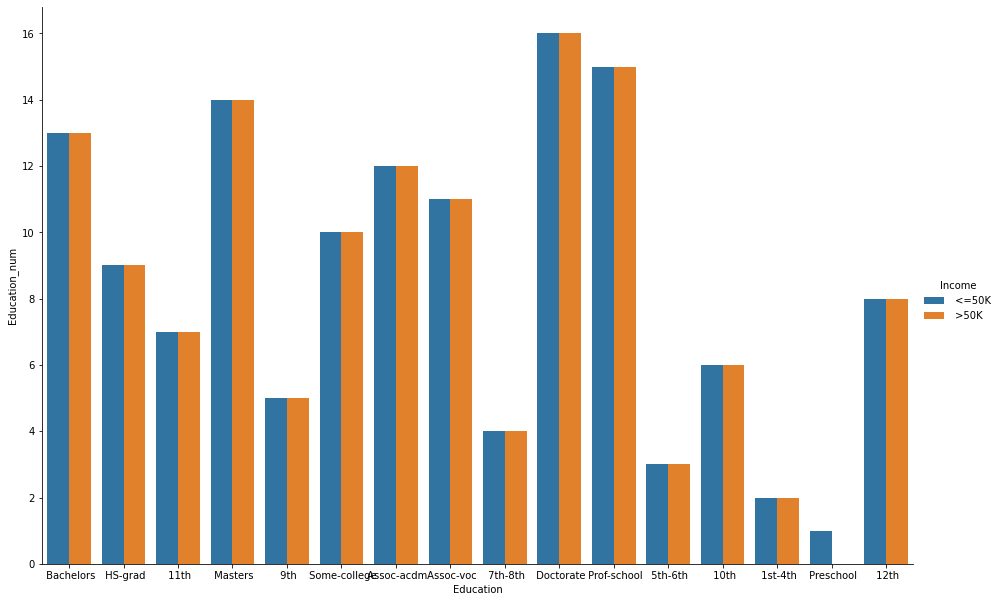

In [35]:

g=sn.catplot(x="Education",y="Education_num",hue="Income",data=df,kind="bar",height=8.27, aspect=12.7/8.27)
plt.show()

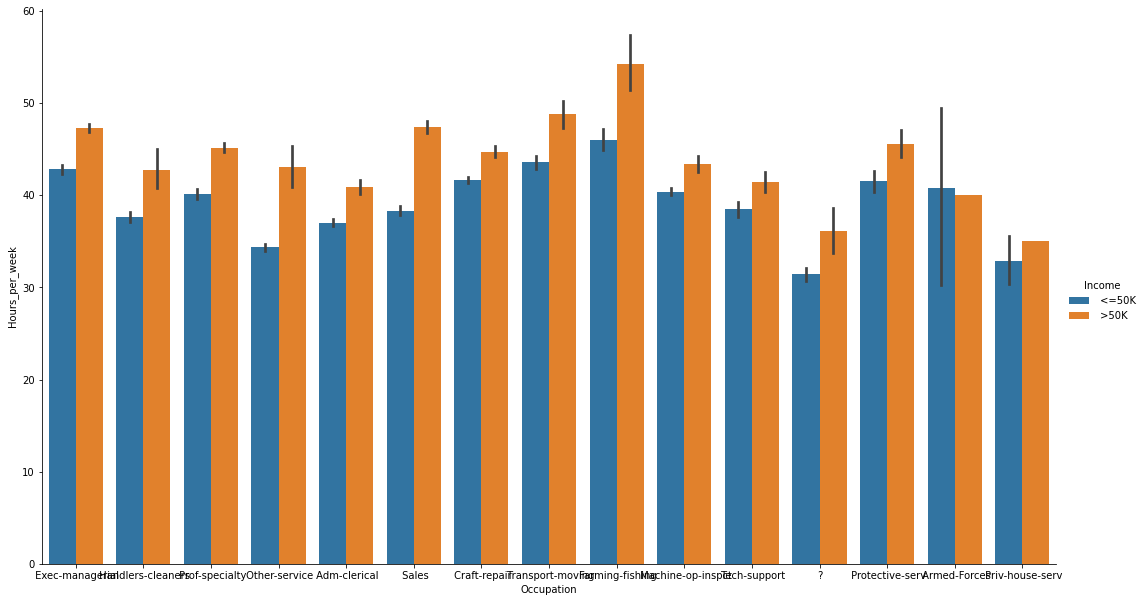

In [39]:
g=sn.catplot(x="Occupation",y="Hours_per_week",hue="Income",data=df,kind="bar",height=8.27, aspect=14.7/8.27)
plt.show()

Farmer ,Transporter, manager and sales people working hour is more and their income is also more than 50K

In [53]:
df['Race'].unique

<bound method Series.unique of 0         White
1         White
2         Black
3         Black
4         White
          ...  
32555     White
32556     White
32557     White
32558     White
32559     White
Name: Race, Length: 32560, dtype: object>

In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
lb=LabelEncoder()
df['Workclass']=lb.fit_transform(df['Workclass'])
df['Education']=lb.fit_transform(df['Education'])
df['Occupation']=lb.fit_transform(df['Occupation'])
df['Relationship']=lb.fit_transform(df['Relationship'])
df['Sex']=lb.fit_transform(df['Sex'])
df['Income']=lb.fit_transform(df['Income'])


In [69]:
df.dtypes

Age                int64
Workclass          int32
Fnlwgt             int64
Education          int32
Education_num      int64
Marital_status    object
Occupation         int32
Relationship       int32
Race              object
Sex                int32
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income             int32
dtype: object

In [74]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,Married-civ-spouse,4,0,White,1,0,0,13,United-States,0
1,38,4,215646,11,9,Divorced,6,1,White,1,0,0,40,United-States,0
2,53,4,234721,1,7,Married-civ-spouse,6,0,Black,1,0,0,40,United-States,0
3,28,4,338409,9,13,Married-civ-spouse,10,5,Black,0,0,0,40,Cuba,0
4,37,4,284582,12,14,Married-civ-spouse,4,5,White,0,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,Married-civ-spouse,13,5,White,0,0,0,38,United-States,0
32556,40,4,154374,11,9,Married-civ-spouse,7,0,White,1,0,0,40,United-States,1
32557,58,4,151910,11,9,Widowed,1,4,White,0,0,0,40,United-States,0
32558,22,4,201490,11,9,Never-married,1,3,White,1,0,0,20,United-States,0


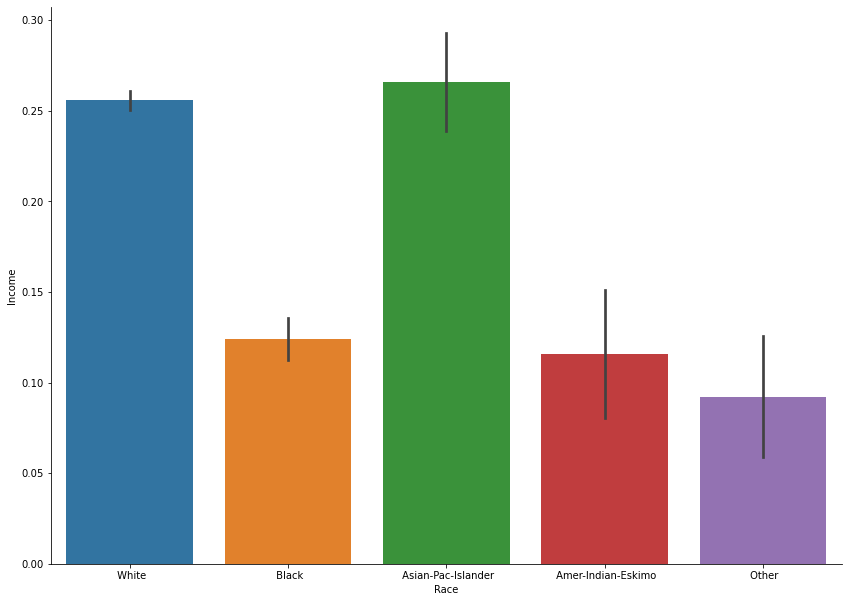

In [73]:
g=sn.catplot(x="Race",y="Income",data=df,kind="bar",height=8.27,aspect=11.7/8.27)
plt.show()

White and Asian-Pac people income is high

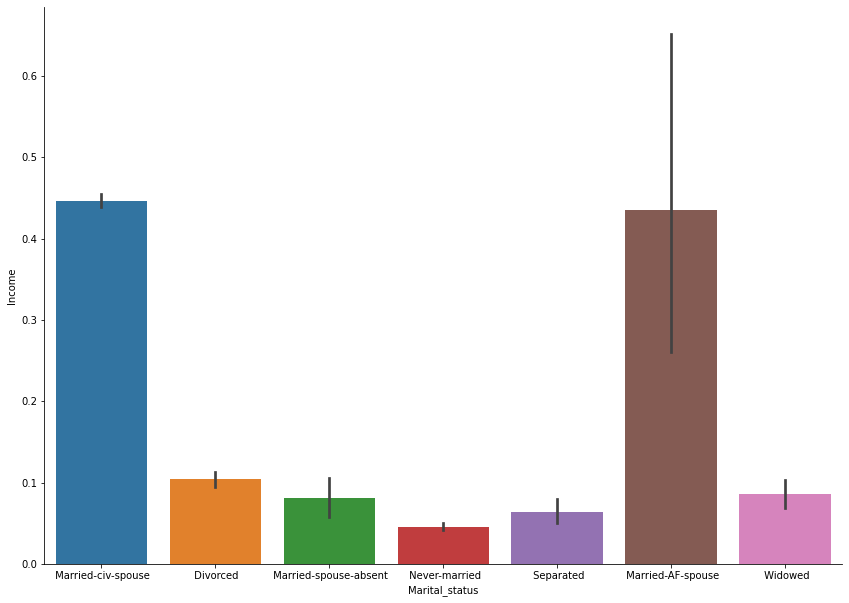

In [71]:
g=sn.catplot(x="Marital_status",y="Income",data=df,kind="bar",height=8.27, aspect=11.7/8.27)
plt.show()

Married CV Spouse and married AF Spouse people income is more

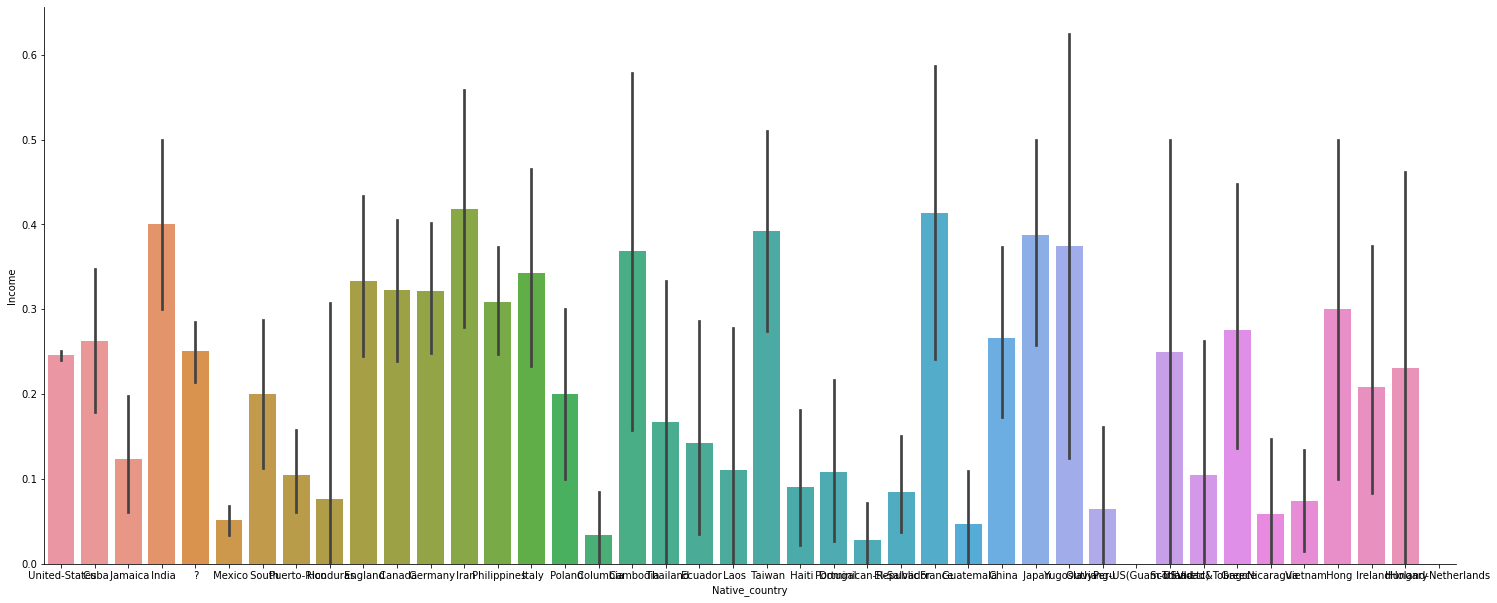

In [76]:
g=sn.catplot(x="Native_country",y="Income",data=df,kind="bar",height=8.27, aspect=20.7/8.27)
plt.show()

US citizen, Indian, European,Japaneese,Candian People's income is high.

In [5]:
df['Race']=lb.fit_transform(df['Race'])
df['Marital_status']=lb.fit_transform(df['Marital_status'])
df['Native_country']=lb.fit_transform(df['Native_country'])

In [6]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0


# Checking Outlier

Age                  AxesSubplot(0.125,0.749828;0.227941x0.130172)
Workclass         AxesSubplot(0.398529,0.749828;0.227941x0.130172)
Fnlwgt            AxesSubplot(0.672059,0.749828;0.227941x0.130172)
Education            AxesSubplot(0.125,0.593621;0.227941x0.130172)
Education_num     AxesSubplot(0.398529,0.593621;0.227941x0.130172)
Marital_status    AxesSubplot(0.672059,0.593621;0.227941x0.130172)
Occupation           AxesSubplot(0.125,0.437414;0.227941x0.130172)
Relationship      AxesSubplot(0.398529,0.437414;0.227941x0.130172)
Race              AxesSubplot(0.672059,0.437414;0.227941x0.130172)
Sex                  AxesSubplot(0.125,0.281207;0.227941x0.130172)
Capital_gain      AxesSubplot(0.398529,0.281207;0.227941x0.130172)
Capital_loss      AxesSubplot(0.672059,0.281207;0.227941x0.130172)
Hours_per_week          AxesSubplot(0.125,0.125;0.227941x0.130172)
Native_country       AxesSubplot(0.398529,0.125;0.227941x0.130172)
Income               AxesSubplot(0.672059,0.125;0.227941x0.130

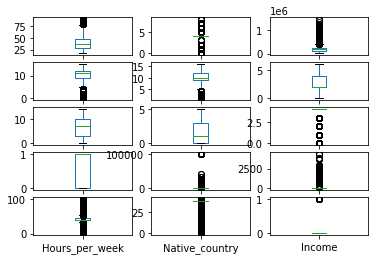

In [7]:
df.plot(kind='box',subplots=True,layout=(5,3))

There are some outliers but all the are descret data so we will not remove outlier

In [8]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.868796,1.897818e+05,10.298249,10.080590,2.611794,6.572912,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.718796,0.240817
std,13.640642,1.455879,1.055498e+05,3.870317,2.572709,1.506225,4.228809,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,7.823892,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783630e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370545e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


In [9]:
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.003786,-0.076646,-0.010508,0.036527,-0.266292,-0.020946,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234039
Workclass,0.003786,1.000000,-0.016587,0.023537,0.052015,-0.064798,0.255004,-0.090449,0.049720,0.095942,0.033828,0.012231,0.138974,-0.007710,0.051645
Fnlwgt,-0.076646,-0.016587,1.000000,-0.028156,-0.043159,0.028184,0.001554,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.051957,-0.009481
Education,-0.010508,0.023537,-0.028156,1.000000,0.359172,-0.038398,-0.021274,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.064291,0.079311
Education_num,0.036527,0.052015,-0.043159,0.359172,1.000000,-0.069338,0.109748,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.050831,0.335182
Marital_status,-0.266292,-0.064798,0.028184,-0.038398,-0.069338,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.023827,-0.199295
Occupation,-0.020946,0.255004,0.001554,-0.021274,0.109748,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.025511,0.017979,0.080384,-0.012532,0.075448
Relationship,-0.263698,-0.090449,0.008922,-0.010879,-0.094145,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.005504,-0.250924
Race,0.028718,0.049720,-0.021278,0.014135,0.031825,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.137849,0.071853
Sex,0.088832,0.095942,0.026882,-0.027349,0.012256,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,-0.008125,0.215995


<AxesSubplot:>

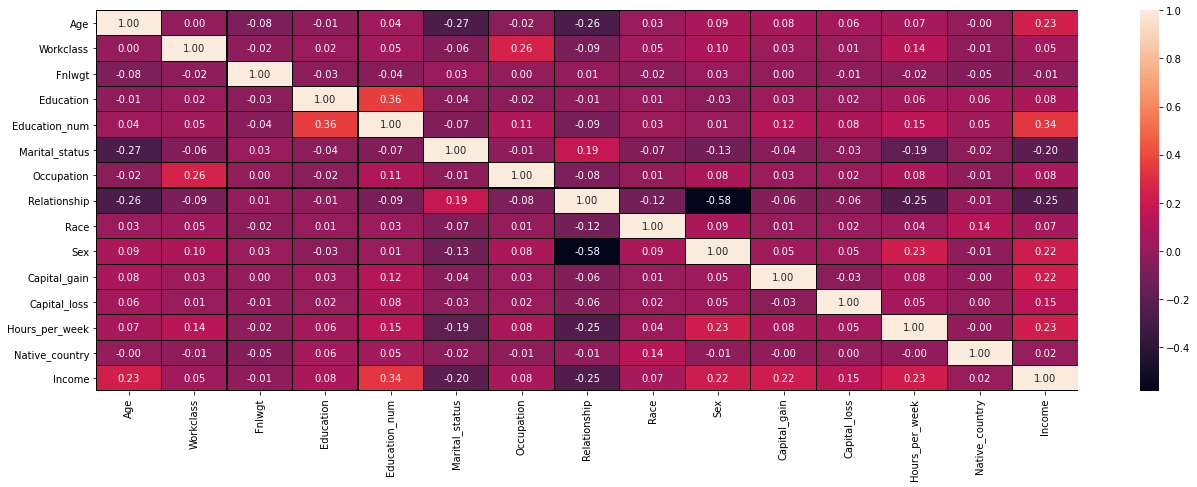

In [10]:
plt.figure(figsize=(22,7))
sn.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

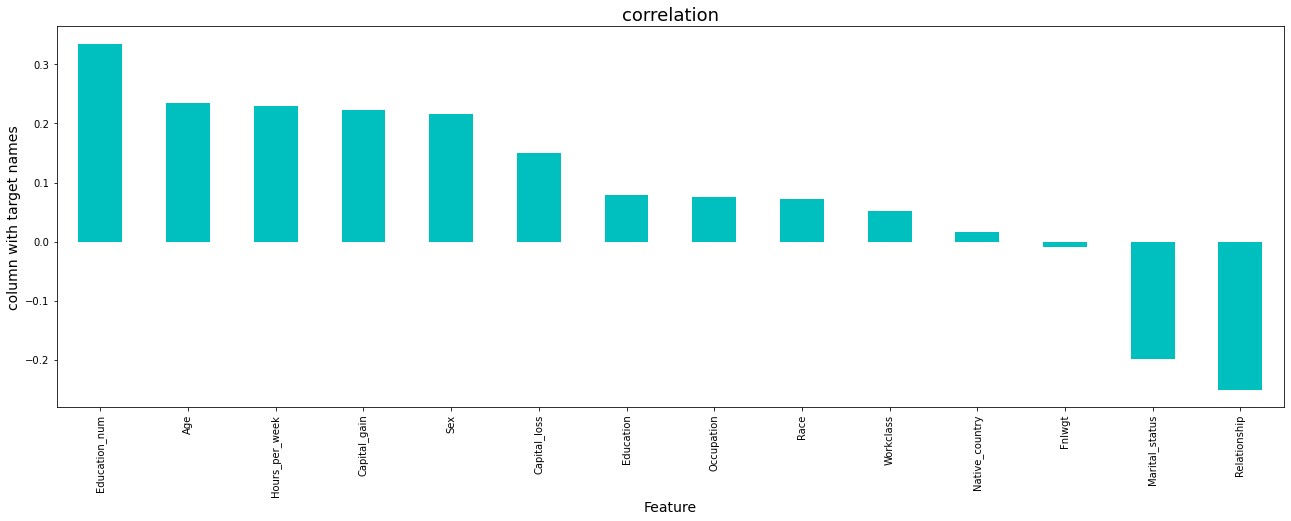

In [11]:
plt.figure(figsize=(22,7))
df.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

There are some positive correlation with income but not high.

In [12]:
x=df.iloc[:,:-1]
x.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39


In [13]:
y=df.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Income, dtype: int32

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [15]:
lg=LogisticRegression()

In [16]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lg.fit(x_train,y_train)
    pred_train=lg.predict(x_train)
    pred_test=lg.predict(x_test)
    print(f"At random state {i},the training accuracy is:- {accuracy_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {accuracy_score(y_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:- 0.7878915847665847
At random state 0,the testing accuracy is:- 0.7867014742014742


At random state 1,the training accuracy is:- 0.7860104422604423
At random state 1,the testing accuracy is:- 0.7928439803439803


At random state 2,the training accuracy is:- 0.7991784398034398
At random state 2,the testing accuracy is:- 0.8039004914004914


At random state 3,the training accuracy is:- 0.7877764127764127
At random state 3,the testing accuracy is:- 0.7886977886977887


At random state 4,the training accuracy is:- 0.7870853808353808
At random state 4,the testing accuracy is:- 0.7873157248157249


At random state 5,the training accuracy is:- 0.7852810196560197
At random state 5,the testing accuracy is:- 0.7982186732186732


At random state 6,the training accuracy is:- 0.8012515356265356
At random state 6,the testing accuracy is:- 0.79745085995086


At random state 7,the training accuracy is:- 0.7900798525798526
At random state 7,the testing accur

At random state 63,the training accuracy is:- 0.7863943488943489
At random state 63,the testing accuracy is:- 0.7916154791154791


At random state 64,the training accuracy is:- 0.7865863022113022
At random state 64,the testing accuracy is:- 0.7891584766584766


At random state 65,the training accuracy is:- 0.7878148034398035
At random state 65,the testing accuracy is:- 0.7902334152334153


At random state 66,the training accuracy is:- 0.8000614250614251
At random state 66,the testing accuracy is:- 0.8002149877149877


At random state 67,the training accuracy is:- 0.7881987100737101
At random state 67,the testing accuracy is:- 0.7840909090909091


At random state 68,the training accuracy is:- 0.800291769041769
At random state 68,the testing accuracy is:- 0.7991400491400491


At random state 69,the training accuracy is:- 0.800406941031941
At random state 69,the testing accuracy is:- 0.7982186732186732


At random state 70,the training accuracy is:- 0.7994855651105651
At random state 70,t

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=66)

In [18]:
x_train.shape

(21815, 14)

In [19]:
x_test.shape

(10745, 14)

In [20]:
y_train.shape

(21815,)

In [21]:
y_test.shape

(10745,)

In [22]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('Acuracy_score',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

Acuracy_score 0.7888320148906468
              precision    recall  f1-score   support

           0       0.81      0.95      0.87      8169
           1       0.63      0.29      0.40      2576

    accuracy                           0.79     10745
   macro avg       0.72      0.62      0.63     10745
weighted avg       0.77      0.79      0.76     10745



In [23]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
print('Acuracy_score',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

Acuracy_score 0.8074453234062354
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      8169
           1       0.59      0.62      0.61      2576

    accuracy                           0.81     10745
   macro avg       0.74      0.74      0.74     10745
weighted avg       0.81      0.81      0.81     10745



In [24]:
svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print('Acuracy_score',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

Acuracy_score 0.7946952070730572
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      8169
           1       0.98      0.15      0.25      2576

    accuracy                           0.79     10745
   macro avg       0.89      0.57      0.57     10745
weighted avg       0.83      0.79      0.73     10745



In [25]:
kn=KNeighborsClassifier()
kn.fit(x_train,y_train)
pred=kn.predict(x_test)
print('Acuracy_score',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

Acuracy_score 0.7693811074918567
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      8169
           1       0.53      0.32      0.40      2576

    accuracy                           0.77     10745
   macro avg       0.67      0.61      0.63     10745
weighted avg       0.74      0.77      0.75     10745



In [26]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('Acuracy_score',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

Acuracy_score 0.8521172638436482
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      8169
           1       0.72      0.63      0.67      2576

    accuracy                           0.85     10745
   macro avg       0.80      0.78      0.79     10745
weighted avg       0.85      0.85      0.85     10745



# Cross Validation

In [27]:
from sklearn.model_selection import cross_val_score

In [28]:
print(cross_val_score(lg,x,y,cv=5).mean())

0.7925061425061426


In [29]:
print(cross_val_score(dt,x,y,cv=5).mean())

0.8069717444717446


In [30]:
print(cross_val_score(rf,x,y,cv=5).mean())

0.8569410319410318


In [31]:
print(cross_val_score(svc,x,y,cv=5).mean())

0.7952088452088452


In [32]:
print(cross_val_score(kn,x,y,cv=5).mean())

0.7765663390663391


# AUC ROC Curve

In [33]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [35]:
y_pred_prob=rf.predict_proba(x_test)[:,1]
y_pred_prob

array([0.  , 0.  , 0.13, ..., 0.  , 0.1 , 0.31])

In [36]:
y_pred_prob.shape

(10745,)

In [37]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [38]:
fpr

array([0.00000000e+00, 0.00000000e+00, 1.22414004e-04, 2.44828008e-04,
       2.44828008e-04, 3.67242012e-04, 9.79312033e-04, 1.46896805e-03,
       2.69310809e-03, 3.18276411e-03, 3.79483413e-03, 4.52931815e-03,
       4.89656017e-03, 6.24311421e-03, 6.97759824e-03, 7.71208226e-03,
       8.81380830e-03, 9.54829232e-03, 1.10172604e-02, 1.21189864e-02,
       1.26086424e-02, 1.35879545e-02, 1.49345085e-02, 1.66483046e-02,
       1.90965846e-02, 2.05655527e-02, 2.16672787e-02, 2.36259028e-02,
       2.53396989e-02, 2.70534949e-02, 2.91345330e-02, 3.01138450e-02,
       3.17052271e-02, 3.37862651e-02, 3.58673032e-02, 3.89276533e-02,
       4.17431754e-02, 4.35793855e-02, 4.54155955e-02, 4.78638756e-02,
       4.99449137e-02, 5.30052638e-02, 5.48414739e-02, 5.79018240e-02,
       6.02276900e-02, 6.24311421e-02, 6.69604603e-02, 7.02656384e-02,
       7.36932305e-02, 7.73656506e-02, 8.03035867e-02, 8.40984209e-02,
       8.67915290e-02, 8.99742931e-02, 9.27898152e-02, 9.69518913e-02,
      

In [39]:
tpr

array([0.        , 0.05434783, 0.08618012, 0.10947205, 0.13548137,
       0.15916149, 0.17818323, 0.19254658, 0.20885093, 0.22360248,
       0.23990683, 0.25465839, 0.26824534, 0.27950311, 0.28959627,
       0.30590062, 0.31948758, 0.33074534, 0.33967391, 0.34937888,
       0.35791925, 0.36490683, 0.37189441, 0.38237578, 0.4048913 ,
       0.41459627, 0.42740683, 0.4367236 , 0.44448758, 0.45108696,
       0.46428571, 0.47515528, 0.48486025, 0.48835404, 0.4988354 ,
       0.50659938, 0.51513975, 0.52212733, 0.5302795 , 0.53998447,
       0.54891304, 0.55900621, 0.56871118, 0.57725155, 0.58462733,
       0.59549689, 0.60403727, 0.61296584, 0.61878882, 0.62849379,
       0.63586957, 0.64246894, 0.65062112, 0.66187888, 0.67352484,
       0.68128882, 0.6882764 , 0.69604037, 0.70341615, 0.71118012,
       0.72127329, 0.73020186, 0.73641304, 0.74340062, 0.75349379,
       0.76242236, 0.76902174, 0.77523292, 0.7826087 , 0.78804348,
       0.79852484, 0.80434783, 0.8128882 , 0.81948758, 0.83035

In [40]:
thresholds

array([2.  , 1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91,
       0.9 , 0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8 ,
       0.79, 0.78, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.7 , 0.69, 0.68,
       0.67, 0.66, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6 , 0.59, 0.58, 0.57,
       0.56, 0.55, 0.54, 0.53, 0.52, 0.51, 0.5 , 0.49, 0.48, 0.47, 0.46,
       0.45, 0.44, 0.43, 0.42, 0.41, 0.4 , 0.39, 0.38, 0.37, 0.36, 0.35,
       0.34, 0.33, 0.32, 0.31, 0.3 , 0.29, 0.28, 0.27, 0.26, 0.25, 0.24,
       0.23, 0.22, 0.21, 0.2 , 0.19, 0.18, 0.17, 0.16, 0.15, 0.14, 0.13,
       0.12, 0.11, 0.1 , 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02,
       0.01, 0.  ])

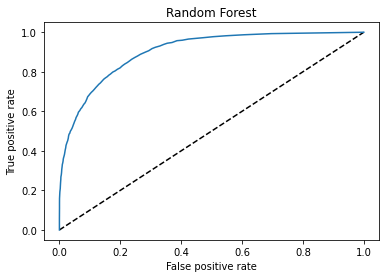

In [41]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest')
plt.show()

In [42]:
auc_score=roc_auc_score(y_test,rf.predict(x_test))

In [43]:
auc_score

0.7755640690947219

# Hyper Parameter Tuning

In [45]:
parameter = {'n_estimators':[100,200, 400, 600, 800, 1000],'max_depth': [10, 20, 30],'min_samples_split': [2, 5, 10],'min_samples_leaf': [3, 4, 5,6],'max_features':['auto', 'sqrt']}

In [ ]:
from sklearn.model_selection import GridSearchCV
GV=GridSearchCV(rf,parameter,cv=5)

In [ ]:
GV.fit(x_train,y_train)

In [ ]:
GV.best_params_

In [46]:
rf=RandomForestClassifier(n_estimators=400,max_depth=30,criterion='gini',min_samples_split=5,min_samples_leaf=4,max_features='auto')
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('Acuracy_score',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

Acuracy_score 0.8612377850162867
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      8169
           1       0.76      0.62      0.68      2576

    accuracy                           0.86     10745
   macro avg       0.82      0.78      0.80     10745
weighted avg       0.86      0.86      0.86     10745



# Saving Model

In [47]:
import pickle
filename = 'Census_Income.pkl'
pickle.dump(rf, open(filename, 'wb'))

In [48]:
loaded_model = pickle.load(open('Census_Income.pkl', 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.8612377850162867
